In [1]:
#JesseRuiz_Capstoneproject_PredictingRecidivisminDomesticViolence_Phase2

# PLAN - PHASE 2

0. [x] Get the data.
0. [ ] Prepare the data for exploration.
0. [ ] Split the data into train and test sets.
0. [ ] Explore the data.
0. [ ] Do cross-validation with the data.
0. [ ] Code and evaluate several models.
0. [ ] Evaluate out of sample data (test set).

# ENVIRONMENT

In [2]:
# basic environment and custom scripts
import os
import acquire
import prepare
import explore
# from prepare import rename_columns
# from prepare import replace_nonvals
# from prepare import value_counts

# numpy and pandas for dataframe building and manipulation
import pandas as pd
import numpy as np
%matplotlib inline

# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing for scaling and splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# xgboost for feature selection
import xgboost as xgb

# Grid search
from sklearn.model_selection import GridSearchCV

# sklearn machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

#  balanced bagging classifier
from imblearn.ensemble import BalancedBaggingClassifier

from functools import reduce

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# PHASE 2 INFORMATION

## During phase 2, we look at a subset of our dataframe (705 cases/respondents) and examine the 497 AW (Abused Woman) cases where there was multiple cases of assault (re-assault).
* The target variable changes from Abuse_past_year to Reassault.
* The focus shifts to analyzing the features that predict that there will be reassault, instead of analyzing when there will be abuse or not.

# ACQUISITION

## Dataframes 6 & 11 contain information on AW (Abused Woman) cases.

In [4]:
dfa, dfb = acquire.get_data()

In [5]:
# dfa is datasets 1, 2, 3, 4, 5, 7. All cases AW and NAW.
dfa.head()

,CASEID,ABUSED,SCRSTATR,LENGTHC1,C1SITUAT,PABUSE,D3RCHILT,E13PRGNT,N7PREGNT,TOTSUPRT,...,N16CHILD,N17ARRST,N1FRQNCY,N2SVRITY,N3WEAPON,N4CHOKE,N5SEX,N6CONTRL,N8JEALUS,N10CPBLE
0,108395,1,1,1,1,1,1,3,2,9,...,2,2,2,2,2,2,2,2,2,2
1,108397,1,1,2,1,1,0,3,3,11,...,2,1,2,1,1,1,1,2,1,1
2,108399,1,1,5,1,1,6,3,2,9,...,2,2,2,2,2,1,2,2,2,2
3,108443,1,1,2,1,1,0,1,2,12,...,2,1,2,2,1,1,2,1,2,2
4,108444,1,1,2,1,1,1,2,2,11,...,2,1,1,1,2,2,2,2,2,2


In [6]:
# dfb is datasets 6 & 11. AW cases only.
dfb.head()

,CASEID,M5FIRED,M11HIGH,M35SAFE,M41ILLGL,M42DAGRR,M13TALKR,M32OTHER,M27HOW,M30ARRES,...,FORCEDR,MISCARR,RESTRAIN,CHOKED,NDRUNK,RDRUNK,BOTHDRUN,NDRUGS,RDRUGS,BOTHDRUG
0,108395,9999,2,1,2,0,1,99,99999,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,...,0,0,0,1,2,0,0,0,0,0
2,108399,9999,2,1,2,0,1,99,99999,3,...,0,0,1,1,0,0,0,0,0,0
3,108443,9999,2,1,2,0,1,13,99999,3,...,0,0,0,1,1,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,...,0,0,0,0,3,0,0,0,0,0


# Examine dfb in more detail. Use custom functions from prepare script to take information from df10 and create a column that shows which cases had repeat offenses.

In [7]:
dfb['RECID'] = dfb.CASEID.apply(prepare.get_repeat_case)

In [8]:
dfb.head()

,CASEID,M5FIRED,M11HIGH,M35SAFE,M41ILLGL,M42DAGRR,M13TALKR,M32OTHER,M27HOW,M30ARRES,...,MISCARR,RESTRAIN,CHOKED,NDRUNK,RDRUNK,BOTHDRUN,NDRUGS,RDRUGS,BOTHDRUG,RECID
0,108395,9999,2,1,2,0,1,99,99999,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,...,0,0,1,2,0,0,0,0,0,1
2,108399,9999,2,1,2,0,1,99,99999,3,...,0,1,1,0,0,0,0,0,0,1
3,108443,9999,2,1,2,0,1,13,99999,3,...,0,0,1,1,0,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,...,0,0,0,3,0,0,0,0,0,1


# Clean up the dataset for exploration...

In [9]:
dfb.columns

Index(['CASEID', 'M5FIRED', 'M11HIGH', 'M35SAFE', 'M41ILLGL', 'M42DAGRR',
       'M13TALKR', 'M32OTHER', 'M27HOW', 'M30ARRES', 'M31HOW', 'M38ORDER',
       'SEVERER', 'TOTINCR', 'THREATR', 'SLAPR', 'PUNCHR', 'BEATR', 'UWEAPON',
       'FORCEDR', 'MISCARR', 'RESTRAIN', 'CHOKED', 'NDRUNK', 'RDRUNK',
       'BOTHDRUN', 'NDRUGS', 'RDRUGS', 'BOTHDRUG', 'RECID'],
      dtype='object')

In [10]:
dfb = prepare.rename_columns_recid(dfb)

In [11]:
dfb.head()

,id,gun_fired,anyone_high,safe_place,forced_illegal,life_danger,talk_about_it,left_or_not,medical_staff_helpful,perp_arrested_ever,...,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs,reassault
0,108395,9999,2,1,2,0,1,99,99999,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,...,0,0,1,2,0,0,0,0,0,1
2,108399,9999,2,1,2,0,1,99,99999,3,...,0,1,1,0,0,0,0,0,0,1
3,108443,9999,2,1,2,0,1,13,99999,3,...,0,0,1,1,0,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,...,0,0,0,3,0,0,0,0,0,1


In [12]:
prepare.value_counts(dfb)

# for col in dfb.columns:
# #         n = dfb[col].unique().shape[0]
# #         col_bins = min(n, 10)
#         print(f'{col}:')
#         if dfb[col].dtype in ['int64', 'float64']:
#             print(dfb[col].value_counts(sort=False, dropna=False))
#         else:
#             print(dfb[col].value_counts(dropna=False))
#         print('\n')

id

-------------------------------------------------------------

gun_fired
1        10
2        41
9999    444
999       2
Name: gun_fired, dtype: int64

-------------------------------------------------------------

anyone_high
1      101
2      389
888      2
999      5
Name: anyone_high, dtype: int64

-------------------------------------------------------------

safe_place
1      391
2       97
999      9
Name: safe_place, dtype: int64

-------------------------------------------------------------

forced_illegal
1       86
2      402
999      9
Name: forced_illegal, dtype: int64

-------------------------------------------------------------

life_danger
0      240
1      249
999      8
Name: life_danger, dtype: int64

-------------------------------------------------------------

talk_about_it
1      352
2      140
999      5
Name: talk_about_it, dtype: int64

-------------------------------------------------------------

left_or_not
(10.911000000000001, 19.8]    125
(19.8, 28.6

In [13]:
prepare.replace_nonvals_recid(dfb)

In [14]:
dfb.head()

,id,gun_fired,anyone_high,safe_place,forced_illegal,life_danger,talk_about_it,left_or_not,medical_staff_helpful,perp_arrested_ever,...,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs,reassault
0,108395,0,0,1,0,0,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,0,0,1,0,0,1,0,0,3,...,0,0,1,2,0,0,0,0,0,1
2,108399,0,0,1,0,0,1,0,0,3,...,0,1,1,0,0,0,0,0,0,1
3,108443,0,0,1,0,0,1,1,0,3,...,0,0,1,1,0,0,0,0,0,0
4,108444,0,1,1,0,0,1,0,0,3,...,0,0,0,3,0,0,0,0,0,1


In [15]:
# Check the value counts of the columns to make sure the function worked
prepare.value_counts(dfb)

id

-------------------------------------------------------------

gun_fired
0    487
1     10
Name: gun_fired, dtype: int64

-------------------------------------------------------------

anyone_high
0    396
1    101
Name: anyone_high, dtype: int64

-------------------------------------------------------------

safe_place
0    106
1    391
Name: safe_place, dtype: int64

-------------------------------------------------------------

forced_illegal
0    411
1     86
Name: forced_illegal, dtype: int64

-------------------------------------------------------------

life_danger
0    248
1    249
Name: life_danger, dtype: int64

-------------------------------------------------------------

talk_about_it
0    145
1    352
Name: talk_about_it, dtype: int64

-------------------------------------------------------------

left_or_not
0    372
1    125
Name: left_or_not, dtype: int64

-------------------------------------------------------------

medical_staff_helpful
0     451
11      7
21   

# Prepare dfa to merge it with the dfb

In [16]:
dfa.columns

Index(['CASEID', 'ABUSED', 'SCRSTATR', 'LENGTHC1', 'C1SITUAT', 'PABUSE',
       'D3RCHILT', 'E13PRGNT', 'N7PREGNT', 'TOTSUPRT', 'G1NUMBER', 'H1JEALUS',
       'H2LIMIT', 'H3KNOWNG', 'J1HIT', 'J2THROWN', 'J3PUSH', 'J4SLAP',
       'J5KICK', 'J6OBJECT', 'J7BEAT', 'J8CHOKE', 'J9KNIFE', 'J10GUN',
       'J11SEX', 'POWER', 'HARASS', 'B1AGE', 'AGEDISP', 'STDETAI', 'SAMESEXR',
       'N11DRUGS', 'N12ALCHL', 'N13SUHIM', 'N16CHILD', 'N17ARRST', 'N1FRQNCY',
       'N2SVRITY', 'N3WEAPON', 'N4CHOKE', 'N5SEX', 'N6CONTRL', 'N8JEALUS',
       'N10CPBLE'],
      dtype='object')

In [17]:
#use prepare function to rename features 
dfa = prepare.rename_columns_all(dfa)

In [18]:
# use prepare function to re-encode data
prepare.replace_nonvals_all(dfa)

In [19]:
dfa.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder
0,108395,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,...,0,1,0,1,1,1,1,0,1,1
2,108399,1,1,5,1,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,108443,1,1,2,1,1,0,1,0,12,...,0,1,0,0,1,1,0,1,0,0
4,108444,1,1,2,1,1,1,0,0,11,...,0,1,1,1,0,0,0,0,0,0


In [20]:
dfa.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'guns_in_home',
       'jealous_past_year', 'limit_family_contact', 'location_tracking',
       'threat_hit', 'threat_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun',
       'rape_with_threat', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'partner_drug_use', 'partner_alcohol_use', 'threat_suicide',
       'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever', 'controlled_ever', 'jealous',
       'capable_murder'],
      dtype='object')

In [21]:
prepare.merge_all_recid(dfa, dfb)

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs,reassault
0,108395,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,...,0,0,1,2,0,0,0,0,0,1
2,108399,1,1,5,1,1,2,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,108443,1,1,2,1,1,0,1,0,12,...,0,0,1,1,0,0,0,0,0,0
4,108444,1,1,2,1,1,1,0,0,11,...,0,0,0,3,0,0,0,0,0,1
5,108456,1,1,2,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,108460,1,1,3,1,1,1,0,1,10,...,0,0,0,0,0,0,0,0,0,1
7,108525,1,1,4,1,2,2,0,0,11,...,0,0,0,0,0,0,0,0,0,1
8,108562,1,1,5,1,1,2,0,0,11,...,0,0,0,2,0,0,0,0,0,1
9,118051,1,0,6,1,1,2,0,0,10,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_so_very_large = prepare.merge_all_recid(dfa, dfb)

In [23]:
df_so_very_large.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs,reassault
0,108395,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,...,0,0,1,2,0,0,0,0,0,1
2,108399,1,1,5,1,1,2,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,108443,1,1,2,1,1,0,1,0,12,...,0,0,1,1,0,0,0,0,0,0
4,108444,1,1,2,1,1,1,0,0,11,...,0,0,0,3,0,0,0,0,0,1


In [24]:
df_so_very_large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 496
Data columns (total 73 columns):
id                              497 non-null int64
abuse_past_year                 497 non-null int64
abuse_status                    497 non-null int64
length_relationship             497 non-null int64
partner_abusive                 497 non-null int64
num_abusers                     497 non-null int64
num_children                    497 non-null int64
pregnant                        497 non-null int64
beaten_while_pregnant           497 non-null int64
support_score                   497 non-null int64
guns_in_home                    497 non-null int64
jealous_past_year               497 non-null int64
limit_family_contact            497 non-null int64
location_tracking               497 non-null int64
threat_hit                      497 non-null int64
threat_object                   497 non-null int64
push_shove                      497 non-null int64
slap                        

In [25]:
prepare.get_nulls_by_column(dfb)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [26]:
prepare.get_nulls_by_row(dfb)

In [27]:
# no nulls found

In [28]:
prepare.get_nulls_by_column(df_so_very_large)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [29]:
prepare.get_nulls_by_row(df_so_very_large)

In [30]:
# no nulls found

In [31]:
df_so_very_large.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'guns_in_home',
       'jealous_past_year', 'limit_family_contact', 'location_tracking',
       'threat_hit', 'threat_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun',
       'rape_with_threat', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'partner_drug_use', 'partner_alcohol_use', 'threat_suicide',
       'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever', 'controlled_ever', 'jealous',
       'capable_murder', 'gun_fired', 'anyone_high', 'safe_place',
       'forced_illegal', 'life_danger', 'talk_about_it', 'left_or_not',
       'medical_staff_helpful', 'perp_a

In [32]:
len(list(df_so_very_large.columns))

73

# Using custom functions in the prepare script, we eliminate some columns from the df. We assume that we now that the really really large df (both dfa/dfb)

In [33]:
df_so_very_large = prepare.drop_cols_df_large(df_so_very_large)

In [34]:
df_so_very_large.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs,reassault
0,108395,1,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,...,0,0,0,0,0,0,1,0,0,1
2,108399,1,1,5,1,1,2,0,0,0,...,0,1,0,0,0,1,1,0,0,1
3,108443,1,1,2,1,1,0,1,0,12,...,0,1,0,0,0,0,1,0,0,0
4,108444,1,1,2,1,1,1,0,0,11,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df_so_very_large.shape

(497, 53)

In [36]:
dfa.shape

(705, 44)

In [37]:
dfb.shape

(497, 30)

In [38]:
df_atemp = df_so_very_large.copy()

In [39]:
df_atemp.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs,reassault
0,108395,1,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,...,0,0,0,0,0,0,1,0,0,1
2,108399,1,1,5,1,1,2,0,0,0,...,0,1,0,0,0,1,1,0,0,1
3,108443,1,1,2,1,1,0,1,0,12,...,0,1,0,0,0,0,1,0,0,0
4,108444,1,1,2,1,1,1,0,0,11,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df_atemp.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'limit_family_contact',
       'location_tracking', 'threat_object', 'push_shove', 'slap',
       'kick_punch', 'hit_object', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'threat_suicide', 'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'rape_ever',
       'controlled_ever', 'jealous', 'capable_murder', 'anyone_high',
       'safe_place', 'forced_illegal', 'life_danger', 'talk_about_it',
       'left_or_not', 'perp_arrested_ever', 'level_severity', 'num_incidents',
       'num_threats', 'num_slapping', 'num_punching', 'num_beating',
       'num_weapon', 'num_forced_sex', 'miscarriage_resulted',
       'restrained_by_perp', 'num_choked', 'num_both_drunk', 'num_both_drugs',

In [41]:
len(list(df_atemp.columns))

53

# Train/Test Split

### TARGET VARIABLE IS REASSAULT IN THIS NEW DF. REMOVE ANY CONTINUOUS VARIABLES.

In [42]:
feats = [col for col in df_so_very_large]

In [43]:
feats.remove('id')
feats.remove('length_relationship')
feats.remove('power_scale')
feats.remove('harass_scale')
feats.remove('id_age')
feats.remove('reassault')

In [44]:
feats

['abuse_past_year',
 'abuse_status',
 'partner_abusive',
 'num_abusers',
 'num_children',
 'pregnant',
 'beaten_while_pregnant',
 'support_score',
 'limit_family_contact',
 'location_tracking',
 'threat_object',
 'push_shove',
 'slap',
 'kick_punch',
 'hit_object',
 'age_disparity',
 'children_not_partner',
 'same_sex_relationship',
 'threat_suicide',
 'partner_reported_child_abuse',
 'partner_arrested',
 'violence_increased',
 'severity_increased',
 'rape_ever',
 'controlled_ever',
 'jealous',
 'capable_murder',
 'anyone_high',
 'safe_place',
 'forced_illegal',
 'life_danger',
 'talk_about_it',
 'left_or_not',
 'perp_arrested_ever',
 'level_severity',
 'num_incidents',
 'num_threats',
 'num_slapping',
 'num_punching',
 'num_beating',
 'num_weapon',
 'num_forced_sex',
 'miscarriage_resulted',
 'restrained_by_perp',
 'num_choked',
 'num_both_drunk',
 'num_both_drugs']

In [45]:
len(feats)

47

In [46]:
# split train and test
train_df, test_df = train_test_split(df_atemp, test_size=.15, random_state=0, stratify=df_so_very_large[['reassault']])

In [47]:
train_df.head()

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,...,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_both_drunk,num_both_drugs,reassault
113,308002,1,1,2,1,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
320,508089,1,0,5,1,1,0,0,1,0,...,4,3,0,0,0,0,99,0,0,1
163,308153,1,1,1,1,1,0,0,0,12,...,1,2,0,1,0,0,1,0,0,1
51,148350,1,1,4,1,1,0,0,0,11,...,1,0,0,0,0,0,0,0,0,0
388,508650,1,1,5,1,1,0,0,0,6,...,0,0,1,0,0,0,0,0,1,0


In [48]:
train_df.shape

(422, 53)

# EXPLORATION

In [49]:
def plot_hist(df):
    """
    Plots the distribution of the dataframe's variables.
    """
    df.hist(figsize=(24, 20), bins=20)

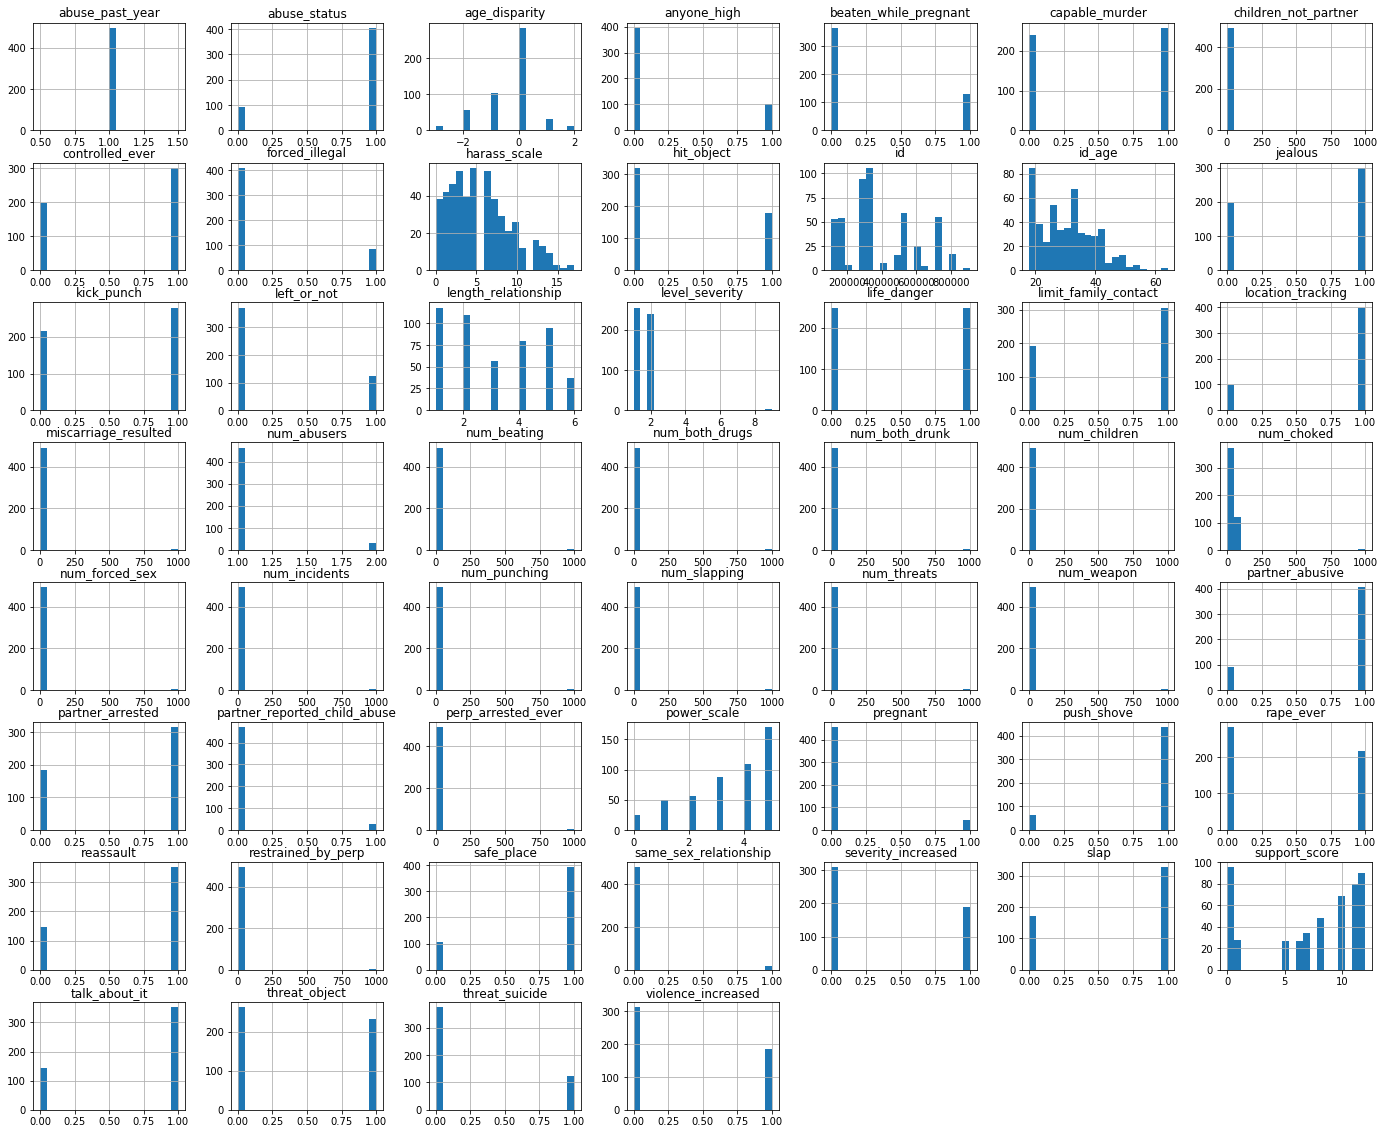

In [50]:
plot_hist(df_atemp)

In [51]:
sig_feats, sig_dict = explore.get_chi_squared(train_df, feats, 'reassault')

abuse_status
Dependent (reject H0)
-----------------------
num_abusers
Dependent (reject H0)
-----------------------
beaten_while_pregnant
Dependent (reject H0)
-----------------------
support_score
Dependent (reject H0)
-----------------------
limit_family_contact
Dependent (reject H0)
-----------------------
location_tracking
Dependent (reject H0)
-----------------------
threat_object
Dependent (reject H0)
-----------------------
push_shove
Dependent (reject H0)
-----------------------
slap
Dependent (reject H0)
-----------------------
kick_punch
Dependent (reject H0)
-----------------------
hit_object
Dependent (reject H0)
-----------------------
threat_suicide
Dependent (reject H0)
-----------------------
partner_arrested
Dependent (reject H0)
-----------------------
violence_increased
Dependent (reject H0)
-----------------------
severity_increased
Dependent (reject H0)
-----------------------
rape_ever
Dependent (reject H0)
-----------------------
controlled_ever
Dependent (rejec

In [52]:
sig_dict


{'abuse_status': 9.704294033829965,
 'num_abusers': 6.159556771485706,
 'beaten_while_pregnant': 12.994761374376118,
 'support_score': 22.078914649439675,
 'limit_family_contact': 39.98562450889354,
 'location_tracking': 29.185471022084464,
 'threat_object': 32.22999380233009,
 'push_shove': 56.12842464562466,
 'slap': 71.0620154167091,
 'kick_punch': 39.71682071678981,
 'hit_object': 23.189282316840345,
 'threat_suicide': 5.537010001727068,
 'partner_arrested': 20.151130647895123,
 'violence_increased': 62.24433692480359,
 'severity_increased': 51.3864041066295,
 'rape_ever': 30.975090698846447,
 'controlled_ever': 24.621267752664686,
 'jealous': 38.377752860073606,
 'capable_murder': 25.309867696742636,
 'anyone_high': 8.43641280095156,
 'safe_place': 9.207303054257993,
 'forced_illegal': 6.613314260211461,
 'life_danger': 30.895480861912226,
 'perp_arrested_ever': 34.28970660360349,
 'level_severity': 33.70063608562691,
 'num_incidents': 422.00000000000006,
 'num_threats': 33.890842

In [53]:
most_significant_features = [item[0] for item in explore.sort_sigs(sig_dict)]

In [54]:
len(most_significant_features)

35

In [55]:
most_significant_features

['num_incidents',
 'num_slapping',
 'slap',
 'num_punching',
 'violence_increased',
 'push_shove',
 'severity_increased',
 'limit_family_contact',
 'kick_punch',
 'jealous',
 'num_beating',
 'perp_arrested_ever',
 'num_threats',
 'level_severity',
 'num_forced_sex',
 'threat_object',
 'rape_ever',
 'life_danger',
 'location_tracking',
 'num_choked',
 'capable_murder',
 'controlled_ever',
 'hit_object',
 'support_score',
 'num_weapon',
 'num_both_drunk',
 'partner_arrested',
 'miscarriage_resulted',
 'beaten_while_pregnant',
 'abuse_status',
 'safe_place',
 'anyone_high',
 'forced_illegal',
 'num_abusers',
 'threat_suicide']

# Import some more datasets... df9, df10, df13-15.

In [56]:
# df9 & 10 are cases of AW (Abused Woman)
df9 = acquire.read_data('data09.csv')
df10 = acquire.read_data('data10.csv')

# df 13, 14 & 15 are cases of HOMICIDE
df13 = acquire.read_data('data13.csv')
df14 = acquire.read_data('data14.csv')
df15 = acquire.read_data('data15.csv')